# Project Overview
In this project, we'll predict future house prices. We'll use economy data from the U.S Federal Reserve, along with house price data from Zillow. We'll merge and combine this data, then use it to train a random forest model. The model will predict if house prices will increase or decrease in the future.

We'll measure error using backtesting, then improve our model with new predictors.

Objective: prediction of future house price changes in New york, United States

# Files Needed

* Federal reserve data
    * [CPI dataset](https://fred.stlouisfed.org/series/CPIAUCSL) - CPIAUCSL.csv
    * [Rental vacancy rate](https://fred.stlouisfed.org/series/RRVRUSQ156N) - RRVRUSQ156N.csv
    * [Mortgage interest rates](https://fred.stlouisfed.org/series/MORTGAGE30US) - MORTGAGE30US.csv
* [Zillow data](https://www.zillow.com/research/data/)
    * ZHVI (raw, weekly) - Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv
    * Median sale price (raw, all homes, weekly) - Metro_median_sale_price_uc_sfrcondo_week.csv
    
    
- `CPIAUCSL.csv` - US CPI (inflation measure) [The CPI can be used to recognize periods of inflation and deflation. Significant increases in the CPI within a short time frame might indicate a period of inflation, and significant decreases in CPI within a short time frame might indicate a period of deflation.]

- `RRVRUSQ156N.csv` - rental vacancy rate, quarterly(rental properties that are vacant)

[The rental vacancy rate is the proportion of the rental inventory that is vacant for rent.]


- `MORTGAGE30US.csv` - mortgage interest rates, weekly[30-Year Fixed Rate Mortgage Average in the United States (MORTGAGE30US)]


- `Metro_median_sale_price_uc_sfrcondo_week.csv` - median sale price for US houses

- `Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv` - Zillow home value index

In [243]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import timedelta

In [244]:
#loading datasets from federal reserve 
fed_files = ["MORTGAGE30US.csv", "RRVRUSQ156N.csv", "CPIAUCSL.csv"]

dfs = [pd.read_csv(f, parse_dates=True, index_col=0) for f in fed_files]

In [245]:
dfs[0]

,MORTGAGE30US
DATE,
1971-04-02,7.33
1971-04-09,7.31
1971-04-16,7.31
1971-04-23,7.31
1971-04-30,7.29
...,...
2022-10-27,7.08
2022-11-03,6.95
2022-11-10,7.08


In [246]:
#Concatenating the 3 datasets
fed_data = pd.concat(dfs, axis=1)

In [247]:
#this shows the datasets are on different timeline
fed_data

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
1947-01-01,NaN,NaN,21.48
1947-02-01,NaN,NaN,21.62
1947-03-01,NaN,NaN,22.00
1947-04-01,NaN,NaN,22.00
1947-05-01,NaN,NaN,21.95
...,...,...,...
2022-10-27,7.08,NaN,NaN
2022-11-03,6.95,NaN,NaN
2022-11-10,7.08,NaN,NaN


In [248]:
#filling missing value using forward fill method
fed_data = fed_data.ffill().dropna()

In [249]:
fed_data

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
1971-04-02,7.33,5.3,40.100
1971-04-09,7.31,5.3,40.100
1971-04-16,7.31,5.3,40.100
1971-04-23,7.31,5.3,40.100
1971-04-30,7.29,5.3,40.100
...,...,...,...
2022-10-27,7.08,6.0,298.062
2022-11-03,6.95,6.0,298.062
2022-11-10,7.08,6.0,298.062


In [250]:
#Loading datasets from zillow
zillow_files = ["Metro_median_sale_price_uc_sfrcondo_week.csv", "Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv"]

dfs = [pd.read_csv(f) for f in zillow_files]

In [251]:
dfs

[     RegionID  SizeRank       RegionName RegionType StateName  2008-02-02  \
 0      102001         0    United States    country       NaN    183300.0   
 1      394913         1     New York, NY        msa        NY    400000.0   
 2      753899         2  Los Angeles, CA        msa        CA    475000.0   
 3      394463         3      Chicago, IL        msa        IL    238000.0   
 4      394514         4       Dallas, TX        msa        TX    133500.0   
 ..        ...       ...              ...        ...       ...         ...   
 163    395117       318  Springfield, OH        msa        OH         NaN   
 164    394390       324     Bismarck, ND        msa        ND         NaN   
 165    394733       370    Kalispell, MT        msa        MT         NaN   
 166    753912       373    Pinehurst, NC        msa        NC         NaN   
 167    394637       385  Grand Forks, ND        msa        MN         NaN   
 
      2008-02-09  2008-02-16  2008-02-23  2008-03-01  ...  202

In [252]:
dfs[0]

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-02,2008-02-09,2008-02-16,2008-02-23,2008-03-01,...,2022-08-06,2022-08-13,2022-08-20,2022-08-27,2022-09-03,2022-09-10,2022-09-17,2022-09-24,2022-10-01,2022-10-08
0,102001,0,United States,country,NaN,183300.0,179900.0,180000.0,175500.0,182000.0,...,348700.0,349000.0,350000.0,347500.0,349900.0,345000.0,344000.0,339900.0,340000.0,340000.0
1,394913,1,"New York, NY",msa,NY,400000.0,410000.0,412620.0,410000.0,390000.0,...,590000.0,580000.0,575000.0,579000.0,580000.0,580000.0,575000.0,557000.0,530000.0,550000.0
2,753899,2,"Los Angeles, CA",msa,CA,475000.0,501500.0,520000.0,521500.0,489000.0,...,890000.0,890000.0,895000.0,850000.0,860000.0,875000.0,862000.0,871000.0,860000.0,860000.0
3,394463,3,"Chicago, IL",msa,IL,238000.0,236000.0,235000.0,245000.0,244750.0,...,317500.0,310000.0,306000.0,288000.0,299000.0,289000.0,290000.0,287000.0,290000.0,291450.0
4,394514,4,"Dallas, TX",msa,TX,133500.0,137500.0,130500.0,136000.0,139900.0,...,399950.0,406000.0,400000.0,393900.0,399900.0,400000.0,390000.0,380000.0,384900.0,392500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,395117,318,"Springfield, OH",msa,OH,NaN,NaN,NaN,NaN,NaN,...,167500.0,150000.0,156000.0,127500.0,155000.0,178000.0,170000.0,154900.0,143000.0,138500.0
164,394390,324,"Bismarck, ND",msa,ND,NaN,NaN,NaN,NaN,NaN,...,305000.0,390000.0,280000.0,288450.0,265000.0,291000.0,308750.0,283500.0,325000.0,303000.0
165,394733,370,"Kalispell, MT",msa,MT,NaN,NaN,NaN,NaN,NaN,...,566250.0,620000.0,550000.0,571500.0,707112.0,502000.0,552500.0,532500.0,631000.0,610480.0
166,753912,373,"Pinehurst, NC",msa,NC,NaN,NaN,NaN,NaN,NaN,...,402500.0,390000.0,400000.0,367500.0,430000.0,400000.0,410000.0,426000.0,405000.0,380000.0


In [253]:
dfs[1]

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31
0,102001,0,United States,country,NaN,128133.0,128479.0,128843.0,129586.0,130335.0,...,328025.0,333242.0,338513.0,344067.0,349100.0,353278.0,355684.0,356726.0,357082.0,357589.0
1,394913,1,"New York, NY",msa,NY,223829.0,225167.0,226370.0,228739.0,230944.0,...,578616.0,583239.0,589646.0,596752.0,604240.0,610227.0,614532.0,616809.0,617791.0,618270.0
2,753899,2,"Los Angeles, CA",msa,CA,229755.0,230555.0,231780.0,234110.0,236608.0,...,873128.0,885390.0,902775.0,921916.0,938423.0,939761.0,936625.0,922542.0,912931.0,903359.0
3,394463,3,"Chicago, IL",msa,IL,168751.0,169149.0,169664.0,170696.0,171789.0,...,291994.0,294542.0,297812.0,301254.0,305188.0,308150.0,309985.0,310305.0,310604.0,311225.0
4,394514,4,"Dallas, TX",msa,TX,129057.0,129160.0,129246.0,129456.0,129676.0,...,348182.0,356594.0,364599.0,373983.0,382587.0,390056.0,392235.0,391300.0,389607.0,389737.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,753929,923,"Zapata, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,119719.0,122580.0,123235.0,123517.0,123510.0,124557.0,125795.0,127319.0,128338.0,128938.0
889,394743,924,"Ketchikan, AK",msa,AK,NaN,NaN,NaN,NaN,NaN,...,367932.0,372820.0,373062.0,373555.0,375426.0,379056.0,382366.0,385688.0,387906.0,390175.0
890,753874,925,"Craig, CO",msa,CO,101856.0,102226.0,102852.0,103597.0,104365.0,...,269616.0,272163.0,272432.0,272593.0,273596.0,277746.0,282502.0,287606.0,289886.0,291642.0
891,394767,926,"Lamesa, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,102058.0,104443.0,105714.0,106833.0,107987.0,109626.0,111403.0,112602.0,112894.0,113192.0


In [254]:
#Selecting data for New york region
dfs = [pd.DataFrame(df.iloc[1,5:]) for df in dfs]
for df in dfs:
    df.index = pd.to_datetime(df.index)
    df["month"] = df.index.to_period("M")

In [255]:
dfs[0]

,1,month
2008-02-02,400000,2008-02
2008-02-09,410000,2008-02
2008-02-16,412620,2008-02
2008-02-23,410000,2008-02
2008-03-01,390000,2008-03
...,...,...
2022-09-10,580000,2022-09
2022-09-17,575000,2022-09
2022-09-24,557000,2022-09
2022-10-01,530000,2022-10


In [256]:
#merging the 2 datasets from zillow based on their month
price_data = dfs[0].merge(dfs[1], on="month")

In [257]:
price_data.index = dfs[0].index

In [258]:
price_data

,1_x,month,1_y
2008-02-02,400000,2008-02,462034
2008-02-09,410000,2008-02,462034
2008-02-16,412620,2008-02,462034
2008-02-23,410000,2008-02,462034
2008-03-01,390000,2008-03,460015
...,...,...,...
2022-09-10,580000,2022-09,617791
2022-09-17,575000,2022-09,617791
2022-09-24,557000,2022-09,617791
2022-10-01,530000,2022-10,618270


In [259]:
#remove month column since it is indexed
del price_data["month"]
#renaming the columns
price_data.columns = ["price", "value"]

In [260]:
price_data

,price,value
2008-02-02,400000,462034
2008-02-09,410000,462034
2008-02-16,412620,462034
2008-02-23,410000,462034
2008-03-01,390000,460015
...,...,...
2022-09-10,580000,617791
2022-09-17,575000,617791
2022-09-24,557000,617791
2022-10-01,530000,618270


In [261]:
from datetime import timedelta
#adding 2 days to the date for uniformity{zillow releases their data 2 days after federal reserves }
fed_data.index = fed_data.index + timedelta(days=2)

In [262]:
fed_data.tail(10)

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
2022-10-01,6.70,6.0,296.761
2022-10-03,6.70,6.0,298.062
2022-10-08,6.66,6.0,298.062
2022-10-15,6.92,6.0,298.062
2022-10-22,6.94,6.0,298.062
2022-10-29,7.08,6.0,298.062
2022-11-05,6.95,6.0,298.062
2022-11-12,7.08,6.0,298.062
2022-11-19,6.61,6.0,298.062


In [263]:
#merging federal reserve data with zillow data
price_data = fed_data.merge(price_data, left_index=True, right_index=True)

In [264]:
#Renaming columns
price_data.columns = ["interest", "vacancy", "cpi", "price", "value"]

In [265]:
price_data

,interest,vacancy,cpi,price,value
2008-02-02,5.68,10.1,212.174,400000,462034
2008-02-09,5.67,10.1,212.687,410000,462034
2008-02-16,5.72,10.1,212.687,412620,462034
2008-02-23,6.04,10.1,212.687,410000,462034
2008-03-01,6.24,10.1,212.687,390000,460015
...,...,...,...,...,...
2022-09-10,5.89,6.0,296.761,580000,617791
2022-09-17,6.02,6.0,296.761,575000,617791
2022-09-24,6.29,6.0,296.761,557000,617791
2022-10-01,6.70,6.0,296.761,530000,618270


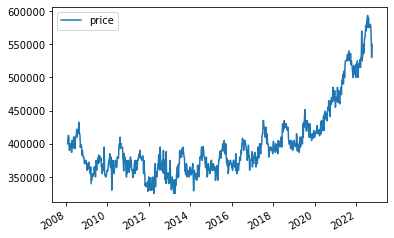

In [266]:
price_data.plot.line(y="price", use_index=True)

In [267]:
#creating new features -[adjusted price and value is price and value without inflation]
price_data["adj_price"] = price_data["price"] / price_data["cpi"] * 100
price_data["adj_value"] = price_data["value"] / price_data["cpi"] * 100


#price column is the average price house is sold for in a week 
#value column is the zillow computated average value of all houses in New york in that week

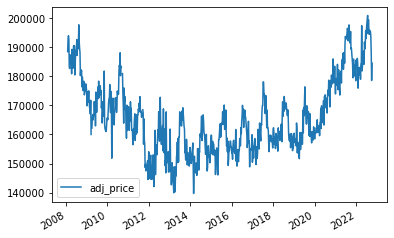

In [268]:
price_data.plot.line(y="adj_price", use_index=True)

In [269]:
#creating new quarter feature from adjusted price
price_data["next_quarter"] = price_data["adj_price"].shift(-13)

In [270]:
price_data

,interest,vacancy,cpi,price,value,adj_price,adj_value,next_quarter
2008-02-02,5.68,10.1,212.174,400000,462034,188525,217762,185634
2008-02-09,5.67,10.1,212.687,410000,462034,192772,217237,182846
2008-02-16,5.72,10.1,212.687,412620,462034,194003,217237,190513
2008-02-23,6.04,10.1,212.687,410000,462034,192772,217237,185867
2008-03-01,6.24,10.1,212.687,390000,460015,183368,216287,190513
...,...,...,...,...,...,...,...,...
2022-09-10,5.89,6.0,296.761,580000,617791,195443,208178,NaN
2022-09-17,6.02,6.0,296.761,575000,617791,193759,208178,NaN
2022-09-24,6.29,6.0,296.761,557000,617791,187693,208178,NaN
2022-10-01,6.70,6.0,296.761,530000,618270,178595,208339,NaN


In [271]:
#dropping missing value
price_data.dropna(inplace=True)

In [272]:
#deriving target -"change" which indicates increase or decrease in price in 3 months time
price_data["change"] = (price_data["next_quarter"] > price_data["adj_price"]).astype(int)

#if price goes up in the next quarter- 1
#if price goes down in the next quarter -0

In [273]:
price_data

,interest,vacancy,cpi,price,value,adj_price,adj_value,next_quarter,change
2008-02-02,5.68,10.1,212.174,400000,462034,188525,217762,185634,0
2008-02-09,5.67,10.1,212.687,410000,462034,192772,217237,182846,0
2008-02-16,5.72,10.1,212.687,412620,462034,194003,217237,190513,0
2008-02-23,6.04,10.1,212.687,410000,462034,192772,217237,185867,0
2008-03-01,6.24,10.1,212.687,390000,460015,183368,216287,190513,1
...,...,...,...,...,...,...,...,...,...
2022-06-11,5.23,5.6,295.328,565000,610227,191313,206627,195443,1
2022-06-18,5.78,5.6,295.328,578000,610227,195715,206627,193759,0
2022-06-25,5.81,5.6,295.328,570000,610227,193006,206627,187693,0
2022-07-02,5.70,5.6,295.328,580000,614532,196392,208085,178595,0


In [274]:
#checking the target for any class imbalance
price_data["change"].value_counts()

1    370
0    357
Name: change, dtype: int64

In [275]:
price_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 727 entries, 2008-02-02 to 2022-07-09
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   interest      727 non-null    float64
 1   vacancy       727 non-null    float64
 2   cpi           727 non-null    float64
 3   price         727 non-null    object 
 4   value         727 non-null    object 
 5   adj_price     727 non-null    object 
 6   adj_value     727 non-null    object 
 7   next_quarter  727 non-null    object 
 8   change        727 non-null    int32  
dtypes: float64(3), int32(1), object(5)
memory usage: 54.0+ KB


In [276]:
#converting the feature to integer data type
price_data["value"] =price_data["value"].astype("int")

price_data["price"]=price_data["price"].astype("int")

price_data["adj_price"]=price_data["adj_price"].astype("int")

price_data["adj_value"]=price_data["adj_value"].astype("int")

price_data["next_quarter"]=price_data["next_quarter"].astype("int")


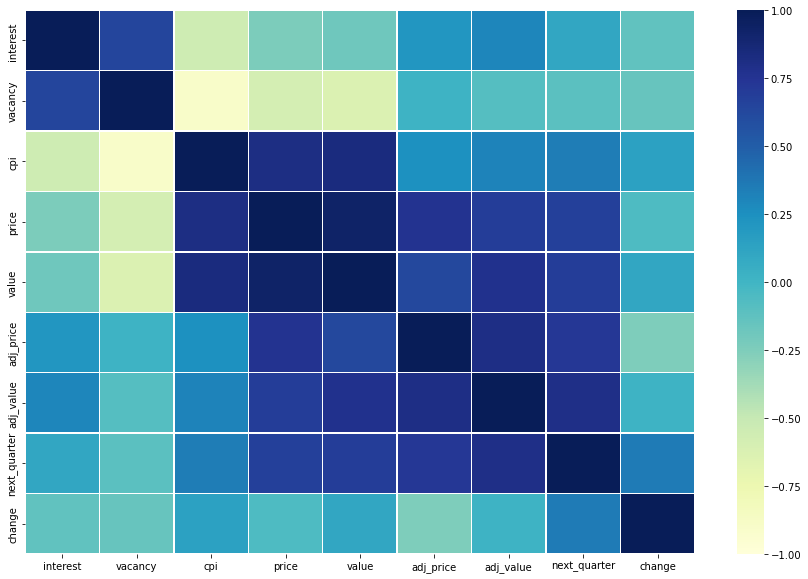

In [277]:
#Correlation matrix
plt.figure(figsize=(15, 10))

corr = price_data.corr()
sns.heatmap(corr, cmap="YlGnBu", linecolor="white", linewidth=0.5, vmin=-1, vmax=1)
plt.show()

## Observations


# Distribution of Price

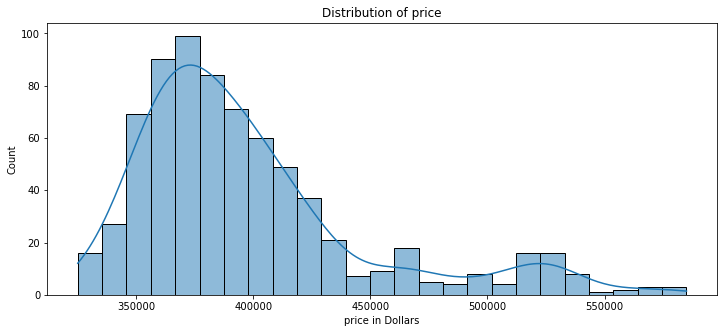

In [278]:
plt.figure(figsize=(12, 5))

sns.histplot(data=price_data, x="price", kde=True)
plt.title("Distribution of price")
plt.xlabel("price in Dollars")

plt.show()

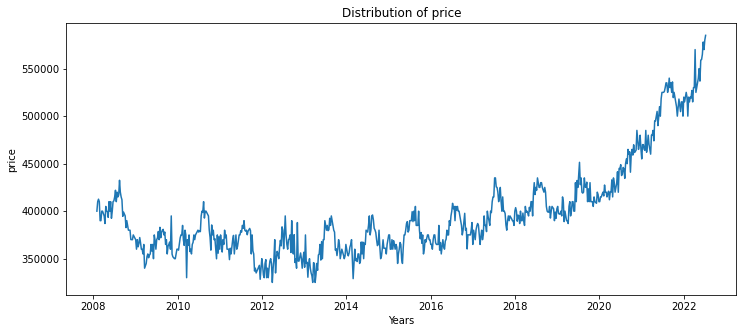

In [279]:
plt.figure(figsize=(12, 5))

sns.lineplot(data=price_data, x=price_data.index, y="price")
plt.title("Distribution of price")
plt.xlabel("Years")

plt.show()

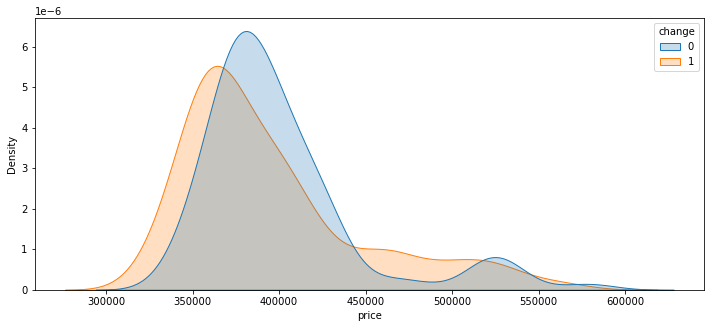

In [280]:

plt.figure(figsize=(12, 5))

sns.kdeplot(data=price_data, x="price", hue="change", fill=True)

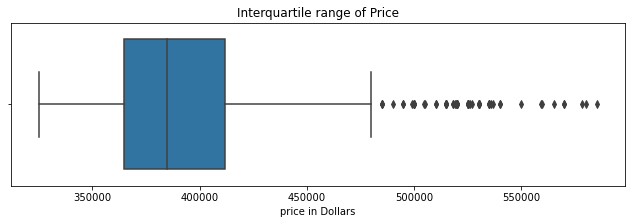

In [281]:
plt.figure(figsize=(11, 3))

sns.boxplot(data=price_data, x="price")
plt.xlabel("price in Dollars")
plt.title("Interquartile range of Price")


plt.show()



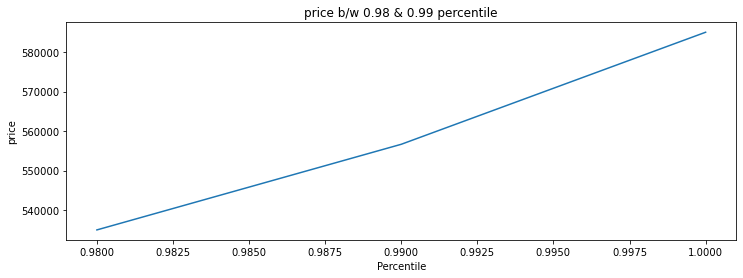

In [282]:
#detect outliers using elbow method
def plot_elbow(ll, hl, col_name, df, y_label):
    plt.figure(figsize=(12, 4))

    pts = df[col_name].quantile(q=np.arange(ll, hl, 0.01))
    sns.lineplot(x=pts.index, y=pts)
    plt.title(f"{y_label} b/w {ll} & {round(hl - 0.01, 2)} percentile")
    plt.xlabel("Percentile")
    plt.ylabel(y_label)

    plt.show()
    
plot_elbow(0.98, 1, "price", price_data,"price")


In [283]:
def outliers():
    """
    Function to collect all indexes identified as outliers.
    """
    outlier_indices = set()

    def update_outlier_indices(df, fltr):
        """
        Nested function to add new outlier indices
        to the set containing unique outlier indices.
        """
        new_idxs = df[fltr].index.tolist()
        print("Received new outlier indices count:", len(new_idxs))
        outlier_indices.update(new_idxs)
        print("Current unique outlier indices count:", len(outlier_indices))

    def get_outlier_indices():
        """
        Nested function to list all unique outlier indices.
        """
        return list(outlier_indices)

    return update_outlier_indices, get_outlier_indices

update_outlier_indices, get_outlier_indices = outliers()


In [284]:
#Accumulate unique outlier indices
fltr = price_data["price"] > 540000
# How threshold 450000 was decided?
price_data.loc[fltr, "price"].sort_values(ascending=False)

update_outlier_indices(price_data, fltr)

Received new outlier indices count: 9
Current unique outlier indices count: 9


# Distribution OF Adjusted Price 

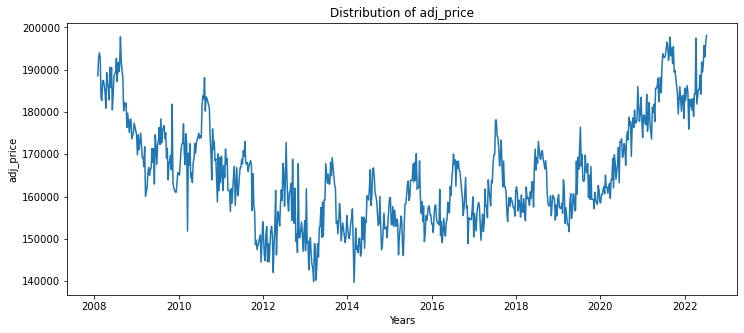

In [285]:
plt.figure(figsize=(12, 5))

sns.lineplot(data=price_data, x=price_data.index, y="adj_price")
plt.title("Distribution of adj_price")
plt.xlabel("Years")

plt.show()

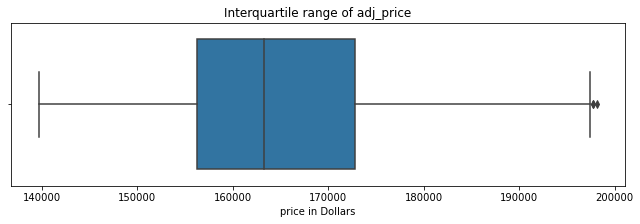

In [286]:
plt.figure(figsize=(11, 3))

sns.boxplot(data=price_data, x="adj_price")
plt.xlabel("price in Dollars")
plt.title("Interquartile range of adj_price")


plt.show()

# Other Distribution

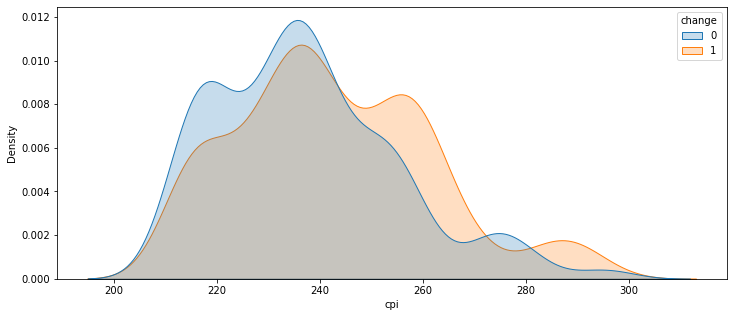

In [287]:

plt.figure(figsize=(12, 5))

sns.kdeplot(data=price_data, x="cpi", hue="change", fill=True)

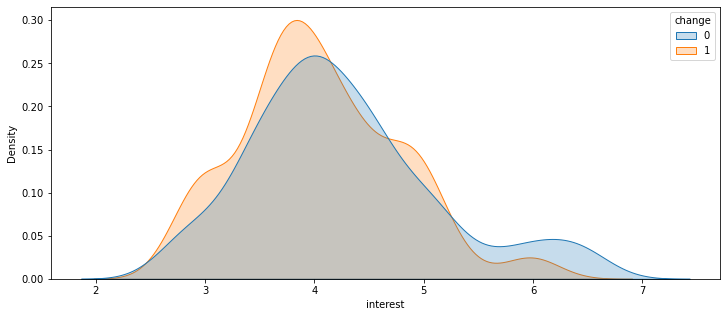

In [288]:

plt.figure(figsize=(12, 5))

sns.kdeplot(data=price_data, x="interest", hue="change", fill=True)

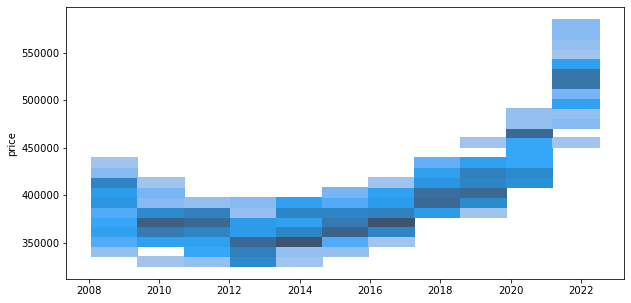

In [289]:
plt.figure(figsize=(10, 5))

sns.histplot(x=price_data.index,y=price_data["price"], kde=True)


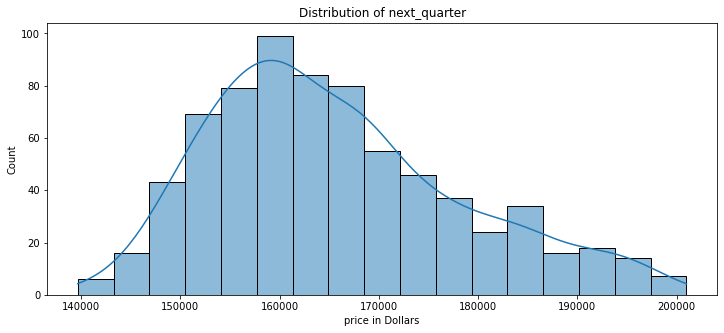

In [290]:
plt.figure(figsize=(12, 5))

sns.histplot(data=price_data, x="next_quarter", kde=True)
plt.title("Distribution of next_quarter")
plt.xlabel("price in Dollars")

plt.show()

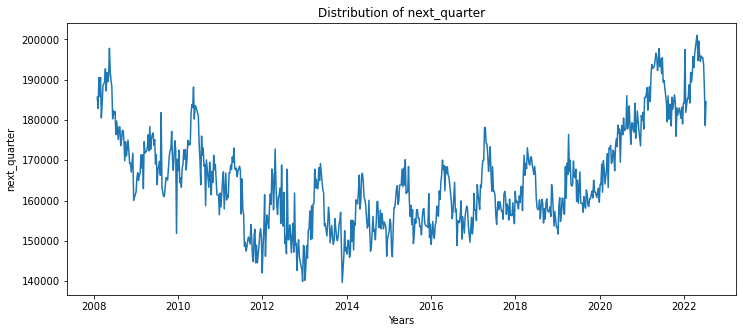

In [291]:
plt.figure(figsize=(12, 5))

sns.lineplot(data=price_data, x=price_data.index, y="next_quarter")
plt.title("Distribution of next_quarter")
plt.xlabel("Years")

plt.show()

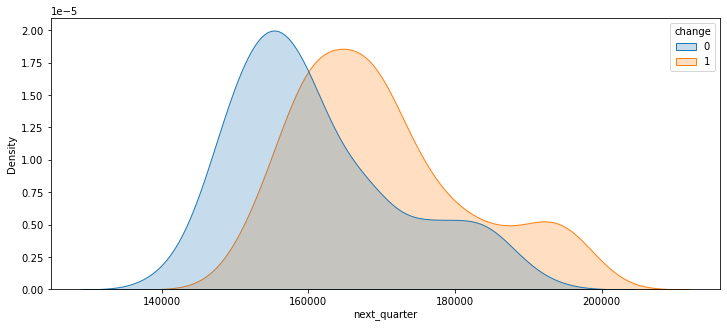

In [292]:

plt.figure(figsize=(12, 5))

sns.kdeplot(data=price_data, x="next_quarter", hue="change", fill=True)

In [293]:
#defining independent and dependent variable

predictors = ['interest', 'vacancy', 'cpi', 'price', 'value', 'adj_price',
       'adj_value', 'next_quarter']
target = "change"

# Modelling

In [294]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score,classification_report,f1_score
import numpy as np

START = 260
STEP = 52

#creating Prediction function
def predict(train, test, predictors, target):
    rf =XGBClassifier( random_state=42)
    rf.fit(train[predictors].values, train[target].values)
    preds = rf.predict(test[predictors].values)
    return preds

#creating Backtesting model

def backtest(data, predictors, target):
    all_preds = []
    for i in range(START, data.shape[0], STEP):
        train = price_data.iloc[:i]
        test = price_data.iloc[i:(i+STEP)]
        all_preds.append(predict(train, test, predictors, target))
    
    preds = np.concatenate(all_preds)
    return preds, accuracy_score(data.iloc[START:][target], preds)

In [295]:
preds, accuracy = backtest(price_data, predictors, target)

In [296]:
preds

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,

In [297]:
accuracy

0.8715203426124197

# Improving Accuracy

In [298]:
#creating new features
yearly = price_data.rolling(52, min_periods=1).mean()#gives the average for the past year of each column
yearly_ratios = [p + "_year" for p in predictors]
price_data[yearly_ratios] = price_data[predictors] / yearly[predictors]#helps show trends between the current year and previous year


In [299]:
price_data

,interest,vacancy,cpi,price,value,adj_price,adj_value,next_quarter,change,interest_year,vacancy_year,cpi_year,price_year,value_year,adj_price_year,adj_value_year,next_quarter_year
2008-02-02,5.68,10.1,212.174,400000,462034,188524,217761,185634,0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2008-02-09,5.67,10.1,212.687,410000,462034,192771,217236,182846,0,0.999119,1.000000,1.001207,1.012346,1.000000,1.011138,0.998793,0.992434
2008-02-16,5.72,10.1,212.687,412620,462034,194003,217236,190513,0,1.005272,1.000000,1.000805,1.012465,1.000000,1.011665,0.999195,1.022444
2008-02-23,6.04,10.1,212.687,410000,462034,192771,217236,185866,0,1.045435,1.000000,1.000603,1.004520,1.000000,1.003925,0.999396,0.998127
2008-03-01,6.24,10.1,212.687,390000,460015,183368,216287,190513,1,1.063032,1.000000,1.000483,0.964096,0.996501,0.963637,0.996020,1.018381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-11,5.23,5.6,295.328,565000,610227,191312,206626,195443,1,1.454954,0.973913,1.052832,1.074658,1.061712,1.020378,1.008613,1.037329
2022-06-18,5.78,5.6,295.328,578000,610227,195714,206626,193758,0,1.584313,0.975871,1.051076,1.096657,1.059293,1.043055,1.007988,1.028335
2022-06-25,5.81,5.6,295.328,570000,610227,193005,206626,187693,0,1.568966,0.977837,1.049326,1.078723,1.056884,1.027725,1.007364,0.996900
2022-07-02,5.70,5.6,295.328,580000,614532,196391,208084,178594,0,1.517432,0.979812,1.047581,1.095187,1.061774,1.045206,1.013706,0.949820


In [300]:
preds, accuracy = backtest(price_data, predictors + yearly_ratios, target)

In [301]:
accuracy

0.9357601713062098

# 93% Accuracy

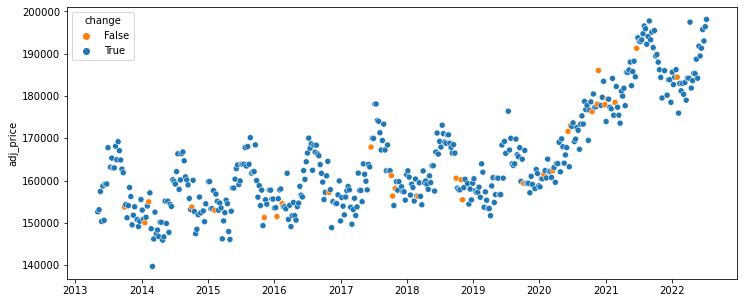

In [302]:
pred_match = (preds == price_data[target].iloc[START:])
plt.figure(figsize=(12, 5))
plot_data = price_data.iloc[START:].copy()
sns.scatterplot(x=plot_data.index,y="adj_price",data=plot_data,hue=pred_match,palette=['tab:orange', 'tab:blue'], 
                   legend='full')

In [303]:
#Checking feature importance
from sklearn.inspection import permutation_importance

rf = RandomForestClassifier(min_samples_split=10, random_state=1)
rf.fit(price_data[predictors], price_data[target])

result = permutation_importance(rf, price_data[predictors], price_data[target], n_repeats=10, random_state=1)

result["importances_mean"]

array([ 0.00784044, -0.00275103, -0.00041265,  0.05350757, -0.00123796,
        0.2085282 ,  0.00110041,  0.32022008])

In [304]:
predictors

['interest',
 'vacancy',
 'cpi',
 'price',
 'value',
 'adj_price',
 'adj_value',
 'next_quarter']

# Conclusion

# This Project was carried out by Adegbehingbe Godwin